In [1]:
from net import Net
import torch
import os
import cv2
import matplotlib.pyplot as plt


In [2]:
model = Net()
model.load_state_dict(torch.load('cnn.pt'))
model.eval()
model = model.float()

In [3]:
images = []
for image_name in os.listdir('sample_squares'): 
    path = os.path.join('sample_squares', image_name)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.astype('float32')
    image = image / 255.0
    image = 1 - image
    image = image - 0.1307
    image = image / 0.3081 
    image = torch.from_numpy(image)
#     image.type(torch.DoubleTensor)
    images.append(image.view(1, 1, 28, 28))

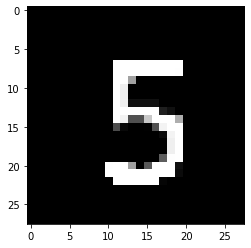

In [4]:
plt.imshow(images[0][0][0], cmap='gray')

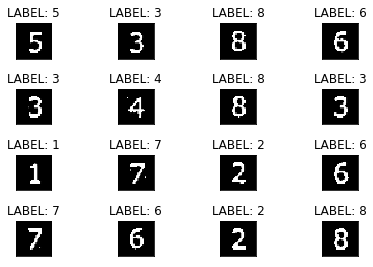

In [5]:
fig = plt.figure()
im1 = images[:16]
im2 = images[16:]
with torch.no_grad(): 
    for i in range(len(im1)):
        image = im1[i]
        plt.subplot(4, 4, i + 1)
        plt.tight_layout()
        output = model(image.float())
        pred = 1 + output.argmax(dim=1, keepdim=True)
        plt.title(f'LABEL: {pred.item()}')
        plt.imshow(image[0][0], cmap='gray')
        plt.xticks([])
        plt.yticks([])

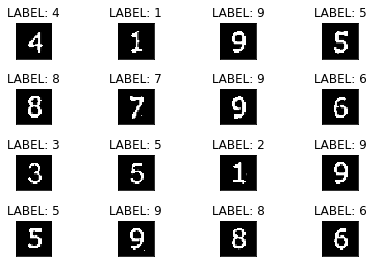

In [6]:
i = 0
with torch.no_grad(): 
    for i in range(len(im2)):
        image = im2[i]
        plt.subplot(4, 4, i + 1)
        plt.tight_layout()
        output = model(image.float())
        pred = 1 + output.argmax(dim=1, keepdim=True)
        plt.title(f'LABEL: {pred.item()}')
        plt.imshow(image[0][0], cmap='gray')
        plt.xticks([])
        plt.yticks([])